In [1]:
%matplotlib inline 


In [2]:
import pandas as pd 
import numpy as np 
import statistics as st 
import matplotlib.pyplot as plt 
import scipy.stats as sts


In [3]:
# Import the data 
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df.head(10)


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12
5,South Latoya,2019-03-11 12:26,9.52,1.995000e+12
6,New Paulville,2019-02-27 11:17,43.25,7.932080e+11
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119540e+11
8,South Karenland,2019-01-08 3:28,35.09,7.995620e+12
9,North Jasmine,2019-03-09 6:26,42.81,5.327640e+12


In [4]:
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Determine types of data in each column 

city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the Unique data points using unique()

city_data_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Obtain number of points for each type 

sum(city_data_df["type"]=="Rural")


18

In [10]:
ride_data_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [13]:
# Merge the two dataframes

combined_df = pd.merge(ride_data_df, city_data_df, how ='left', on = ["city", "city"])

combined_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,2019-03-11 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2019-02-27 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,2019-01-08 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,2019-03-09 6:26,42.81,5.327640e+12,33,Urban


In [14]:
driver = combined_df["driver_count"].sum()


In [15]:
# Creating Urban df

urban_cities_df = combined_df[combined_df["type"]=="Urban"]
urban_cities_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,2019-03-11 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2019-02-27 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,2019-01-08 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,2019-03-09 6:26,42.81,5.327640e+12,33,Urban


In [16]:
# Creating Rural df

rural_cities_df = combined_df[combined_df["type"]=="Rural"]
rural_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2019-02-02 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,2019-03-27 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,2019-05-06 8:57,51.80,4.018030e+12,2,Rural
2255,Taylorhaven,2019-04-06 1:01,45.31,2.275360e+12,1,Rural
2256,Garzaport,2019-02-18 18:27,36.16,2.928340e+12,7,Rural
2257,New Ryantown,2019-01-27 17:33,42.68,7.994600e+12,2,Rural
2258,Lake Latoyabury,2019-04-02 21:00,13.46,8.232860e+12,2,Rural
2259,North Holly,2019-02-16 17:02,39.46,4.571480e+12,8,Rural


In [17]:
# Creating Urban df

suburban_cities_df = combined_df[combined_df["type"]=="Suburban"]
suburban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,2019-04-07 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,2019-01-17 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2019-02-27 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,2019-04-19 1:06,37.78,2.273050e+12,12,Suburban
1630,East Marymouth,2019-03-29 8:36,37.60,6.370860e+12,5,Suburban
1631,New Raymond,2019-02-25 21:40,20.44,5.984510e+12,17,Suburban
1632,Lake Robertside,2019-01-11 20:17,46.51,6.574330e+12,4,Suburban
1633,Josephside,2019-03-30 9:45,44.74,5.592690e+12,25,Suburban
1634,Brandonfort,2019-01-14 12:35,28.02,8.100260e+12,10,Suburban


In [18]:
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]

suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]

rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]

urban_ride_count
len(suburban_ride_count)


36

In [19]:
urban_average_fare = urban_cities_df.groupby("city").mean()["fare"]
urban_average_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
# Find Average Fare Costs 

rural_average_fare = rural_cities_df.groupby("city").mean()["fare"]
suburban_average_fare = suburban_cities_df.groupby("city").mean()["fare"]
len(suburban_average_fare)


36

In [21]:
# Find average Driver Count 

urban_average_driver = urban_cities_df.groupby("city").mean()["driver_count"]
urban_average_driver.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [22]:
# Find average driver count
suburban_average_driver = suburban_cities_df.groupby("city").mean()["driver_count"]
rural_average_driver = rural_cities_df.groupby("city").mean()["driver_count"]
len(suburban_average_driver)


36

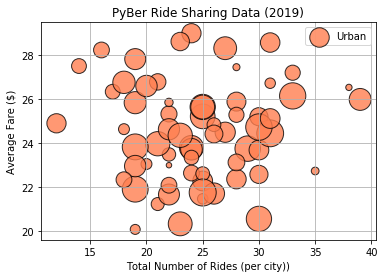

In [23]:
# Create Scatter Plot
    
plt.scatter(urban_ride_count, urban_average_fare, s = 10*urban_average_driver, c = "coral", edgecolor = "black", linewidths = 1, 
            alpha = 0.8, label = "Urban") 
plt.title("PyBer Ride Sharing Data (2019)") 
plt.ylabel("Average Fare ($)") 
plt.xlabel("Total Number of Rides (per city))") 
plt.grid(True) 
plt.legend()


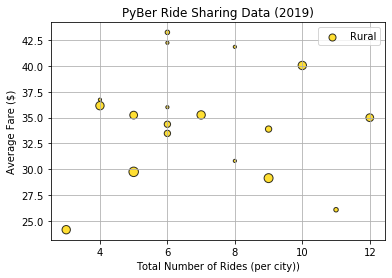

In [24]:
plt.scatter(rural_ride_count, rural_average_fare, s = 10*rural_average_driver, c = "gold", edgecolor = "black", linewidths = 1, 
            alpha = 0.8, label = "Rural") 
plt.title("PyBer Ride Sharing Data (2019)") 
plt.ylabel("Average Fare ($)") 
plt.xlabel("Total Number of Rides (per city))") 
plt.grid(True) 
plt.legend()


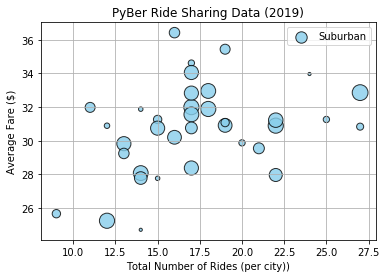

In [25]:
plt.scatter(suburban_ride_count, suburban_average_fare, s = 10*suburban_average_driver, c = "skyblue", edgecolor = "black", linewidths = 1, 
            alpha = 0.8, label = "Suburban") 
plt.title("PyBer Ride Sharing Data (2019)") 
plt.ylabel("Average Fare ($)") 
plt.xlabel("Total Number of Rides (per city))") 
plt.grid(True) 
plt.legend()

In [26]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

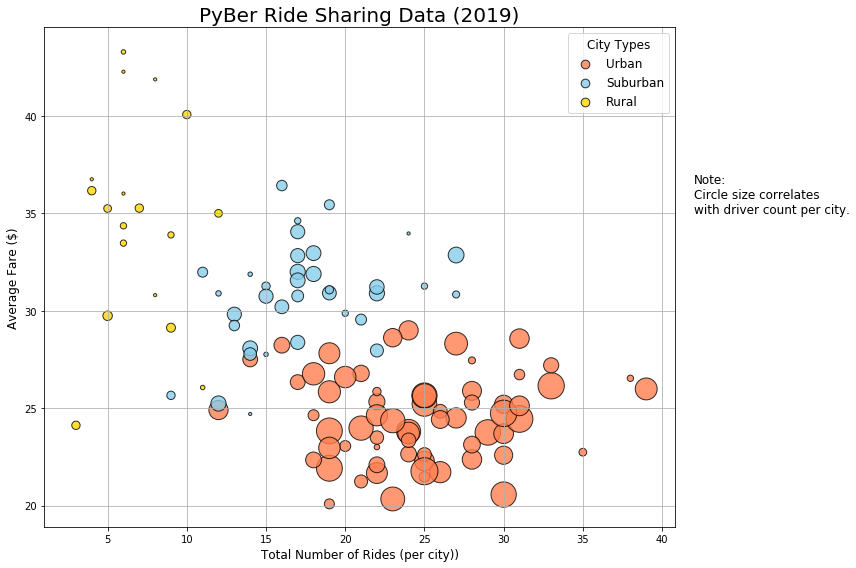

In [27]:
plt.subplots(figsize=(12,8))

plt.scatter(urban_ride_count, urban_average_fare, s = 10*urban_average_driver, c = "coral", edgecolor = "black", linewidths = 1, 
            alpha = 0.8, label = "Urban") 
plt.scatter(suburban_ride_count, suburban_average_fare, s = 10*suburban_average_driver, c = "skyblue", edgecolor = "black", linewidths = 1, 
            alpha = 0.8, label = "Suburban") 
plt.scatter(rural_ride_count, rural_average_fare, s = 10*rural_average_driver, c = "gold", edgecolor = "black", linewidths = 1, 
            alpha = 0.8, label = "Rural") 
# Adding note 
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

plt.title("PyBer Ride Sharing Data (2019)", fontsize = 20) 
plt.ylabel("Average Fare ($)", fontsize = 12) 
plt.xlabel("Total Number of Rides (per city))", fontsize = 12) 
plt.grid(True) 
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.savefig('analysis/Fig1.png')


In [28]:
# Obtain statistics for DF's using Pandas

urban_cities_df.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [29]:
rural_cities_df.describe()


,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [30]:
suburban_cities_df.describe()


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [31]:
suburban_ride_count.describe()


count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [32]:
rural_ride_count.describe()


count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [33]:
urban_ride_count.describe()


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [34]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)


(24.62, 17.36, 6.94)

In [35]:
urban_ride_count.median()


24.0

In [36]:
urban_ride_count.mode()


0    22
1    25
dtype: int64

In [37]:
suburban_ride_count.mode()


0    17
dtype: int64

In [38]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [39]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_rural_ride_count}.")


The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mode for the ride counts for suburban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [40]:
urban_fares = urban_cities_df["fare"] 
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"] 


In [41]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [42]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [43]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [44]:
urban_drivers = urban_cities_df["driver_count"] 
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")

print(f"The total number of drivers in the Urban cities is {urban_drivers.sum()}.")

The mean driver count for urban cities is 36.68.
The median driver count for urban cities is 37.00.
The mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The total number of drivers in the Urban cities is 59602.


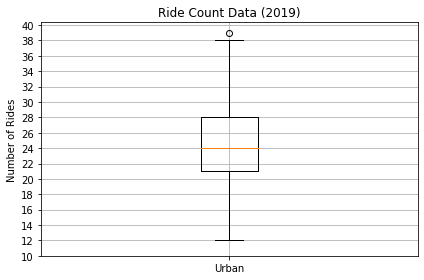

In [45]:
# Box and Whisker Plot 

x_labels = ["Urban"] 

fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels) 
# Add the title, y-axis label and grid 
ax.set_title("Ride Count Data (2019)") 
ax.set_ylabel("Number of Rides") 
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()


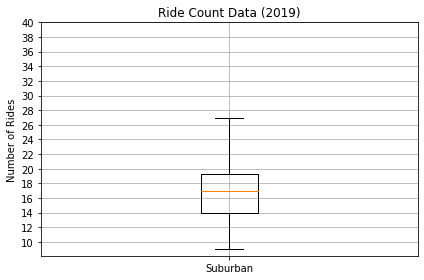

In [46]:
# Box and Whisker Plot 

x_labels = ["Suburban"] 

fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels) 
# Add the title, y-axis label and grid 
ax.set_title("Ride Count Data (2019)") 
ax.set_ylabel("Number of Rides") 
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

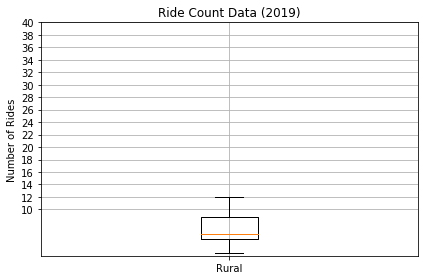

In [47]:
# Box and Whisker Plot 

x_labels = ["Rural"] 

fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels) 
# Add the title, y-axis label and grid 
ax.set_title("Ride Count Data (2019)") 
ax.set_ylabel("Number of Rides") 
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

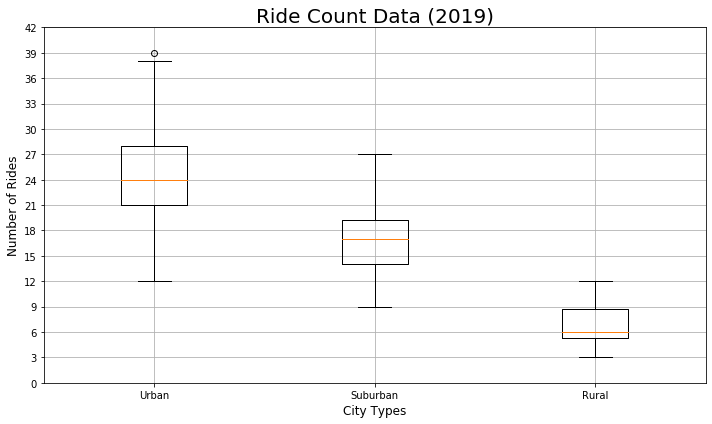

In [48]:
# Box and Whisker Plot 

x_labels = ["Urban", "Suburban", "Rural"] 
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10,6))

ax.boxplot(ride_count_data, labels = x_labels) 
# Add the title, y-axis label and grid 
ax.set_title("Ride Count Data (2019)", fontsize=20) 
ax.set_ylabel("Number of Rides", fontsize = 12) 
ax.set_xlabel("City Types", fontsize = 12) 
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
plt.savefig("analysis/Fig2.png")
plt.show()

In [49]:
# Obtain outlier city in Urban cities 
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


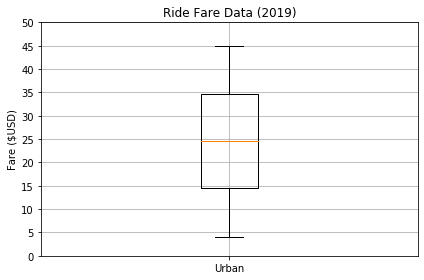

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [50]:
# box and wishker for Urban Fare 
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels) 
# Add the title, y-axis label and grid. 
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()
print("Summary Statistics") 
urban_fares.describe()


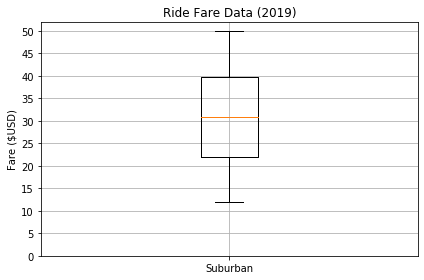

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [51]:
# box and wishker for Urban Fare 
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels) 
# Add the title, y-axis label and grid. 
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()
print("Summary Statistics") 
suburban_fares.describe()

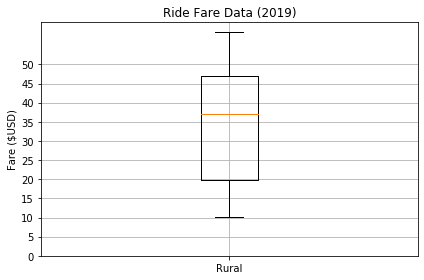

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [52]:
# box and wishker for Urban Fare 
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels) 
# Add the title, y-axis label and grid. 
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()
print("Summary Statistics") 
rural_fares.describe()

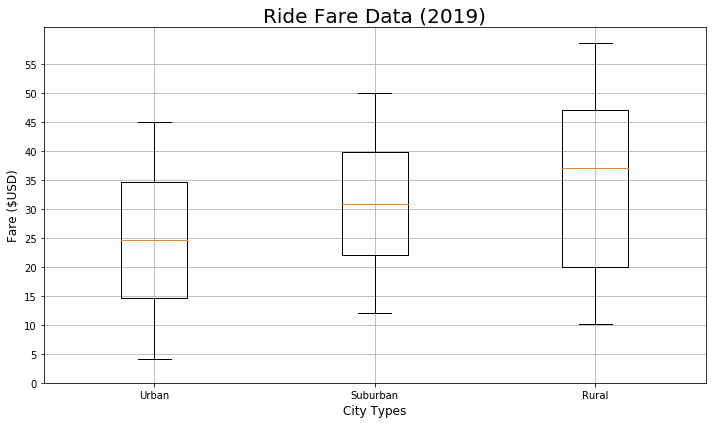

In [53]:
# box and wishker for Urban Fare 
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(fare_data, labels = x_labels) 
# Add the title, y-axis label and grid. 
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=12)
ax.set_xlabel("City Types", fontsize=12)
ax.set_yticks(np.arange(0,56,step=5))
ax.grid()
plt.savefig('analysis/Fig3.png')
plt.show()


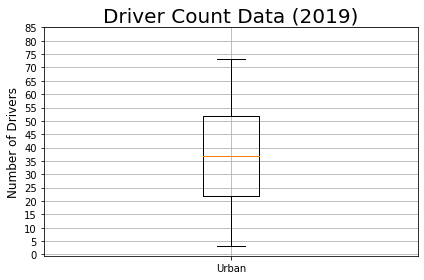

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [54]:
# Create box and whisker plots for Driver data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)

ax.set_title("Driver Count Data (2019)", fontsize=20) 
ax.set_ylabel("Number of Drivers", fontsize =12)
ax.set_yticks(np.arange(0,90,step =5.0))
ax.grid()
plt.show()
print("Summary Statistics") 
urban_drivers.describe()


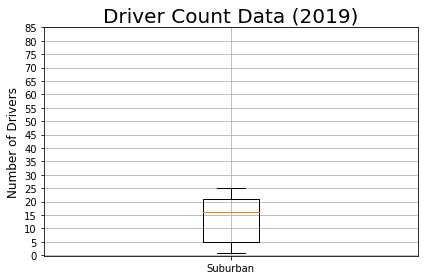

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [55]:
# Create box and whisker plots for Driver data
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels = x_labels)

ax.set_title("Driver Count Data (2019)", fontsize=20) 
ax.set_ylabel("Number of Drivers", fontsize =12)
ax.set_yticks(np.arange(0,90,step =5.0))
ax.grid()
plt.show()
print("Summary Statistics") 
suburban_drivers.describe()

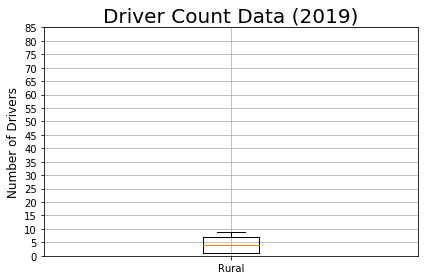

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [56]:
# Create box and whisker plots for Driver data
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels = x_labels)

ax.set_title("Driver Count Data (2019)", fontsize=20) 
ax.set_ylabel("Number of Drivers", fontsize =12)
ax.set_yticks(np.arange(0,90,step =5.0))
ax.grid()
plt.show()
print("Summary Statistics") 
rural_drivers.describe()

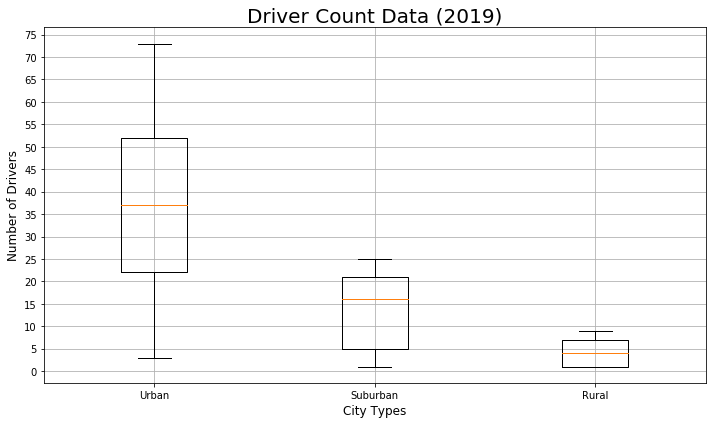

In [57]:
# Create box and whisker plots for Driver data
x_labels = ["Urban", "Suburban", "Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(drivers_data, labels = x_labels)

ax.set_title("Driver Count Data (2019)", fontsize=20) 
ax.set_ylabel("Number of Drivers", fontsize =12)
ax.set_xlabel("City Types", fontsize =12)

ax.set_yticks(np.arange(0,76,step =5.0))
ax.grid()
plt.savefig('analysis/Fig4.png')
plt.show()


In [58]:
# Obtain Fares for City Type 
fare_by_type = combined_df.groupby("type").sum()["fare"]
fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [59]:
total_fares = combined_df["fare"].sum()
total_fares

63538.64

In [60]:
percent_by_type = 100* combined_df.groupby(["type"]).sum()["fare"]/ combined_df["fare"].sum()
percent_by_type


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [61]:
import matplotlib as mpl

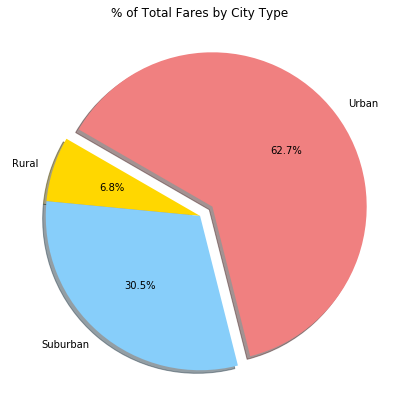

In [62]:
# Create Pie chart showing percentages
explode = [0,0,0.1]
plt.subplots(figsize = (10,6))

colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]
plt.pie(percent_by_type, labels = labels, explode = explode, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title('% of Total Fares by City Type')
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig5.png")
plt.show()



In [63]:
# Pie Charts for Total Rides by City Type 

percent_rides_type = 100* combined_df.groupby(["type"]).count()["ride_id"] / combined_df["ride_id"].count()
percent_rides_type


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

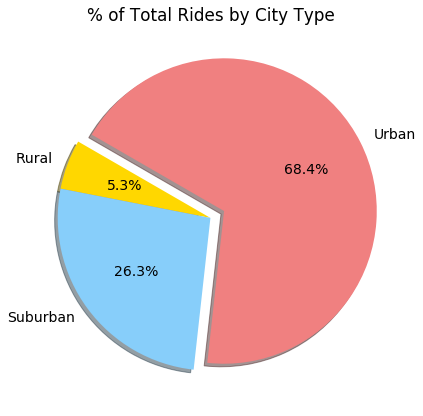

In [64]:
# Create Pie chart showing percentages
explode = [0,0,0.1]
plt.subplots(figsize = (10,6))

colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]
plt.pie(percent_rides_type, labels = labels, explode = explode, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title('% of Total Rides by City Type')
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig6.png")
plt.show()


In [65]:
# Percentage of Drivers by city type (Pie Chart) 

percent_drivers_type = 100 * city_data_df.groupby(["type"]).sum()["driver_count"]/ city_data_df["driver_count"].sum()
percent_drivers_type


type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

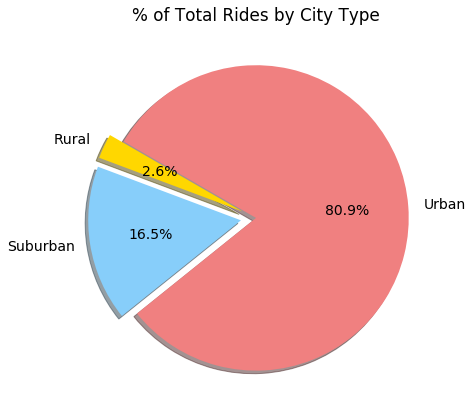

In [66]:
# Create Pie chart showing percentages
explode = [0.1,0.1,0]
plt.subplots(figsize = (10,6))

colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]
plt.pie(percent_drivers_type, labels = labels, explode = explode, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title('% of Total Rides by City Type')
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig7.png")
plt.show()

In [67]:
# Start of Challenge 5 

# Create Summary DataFrame

summary_df = pd.DataFrame()
summary_df["Total Rides"] = combined_df.groupby(["type"]).count()["ride_id"]
summary_df["Total Drivers"] = city_data_df.groupby(["type"]).sum()["driver_count"]
summary_df["Total Fares"] = combined_df.groupby(["type"]).sum()["fare"]
summary_df["Average Fare per Ride"] = summary_df["Total Fares"] / summary_df["Total Rides"]
summary_df["Average Fare per Driver"] = summary_df["Total Fares"] / summary_df["Total Drivers"]

summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [68]:
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:.2f}".format)
summary_df



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",34.62,55.49
Suburban,625,490,"$19,356.33",30.97,39.50
Urban,"1,625","2,405","$39,854.38",24.53,16.57
